# (Core) Resampling Datetime Data
*  **Nicholas Giuffrida**

In [1]:
# Imports
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN
15340,20201231,7.0,1.3,34.0,1.5,-0.8,-3.1,0.0,100500.0,NaN


In [3]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
# Inspect the data
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [5]:
# Set the date column as the index
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [7]:
df2 = df.copy()

In [8]:
# filter for relevant years and columns
df = df.loc['2000':'2010', ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [9]:
# Check for missing data
df.isna().sum()

precipitation     196
mean_temp         224
min_temp          196
max_temp          196
snow_depth       1049
dtype: int64

In [10]:
# Use .interpolate to deal with null temps
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [11]:
# Make Null values in precipitation related columns zero
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [12]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [13]:
ts = df['precipitation'].copy()
ts

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [14]:
ts_2 = ts.resample("M").sum()
ts_2.name = 'Resampled'
ts_2.head()

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
Freq: M, Name: Resampled, dtype: float64

##  Qestion 1:
* What month had the most precipitation between 2000 through 2010?

In [15]:
max_date = ts_2.idxmax()
max_date

Timestamp('2009-11-30 00:00:00', freq='M')

In [16]:
plt.rcParams['figure.figsize'] = (11,6)

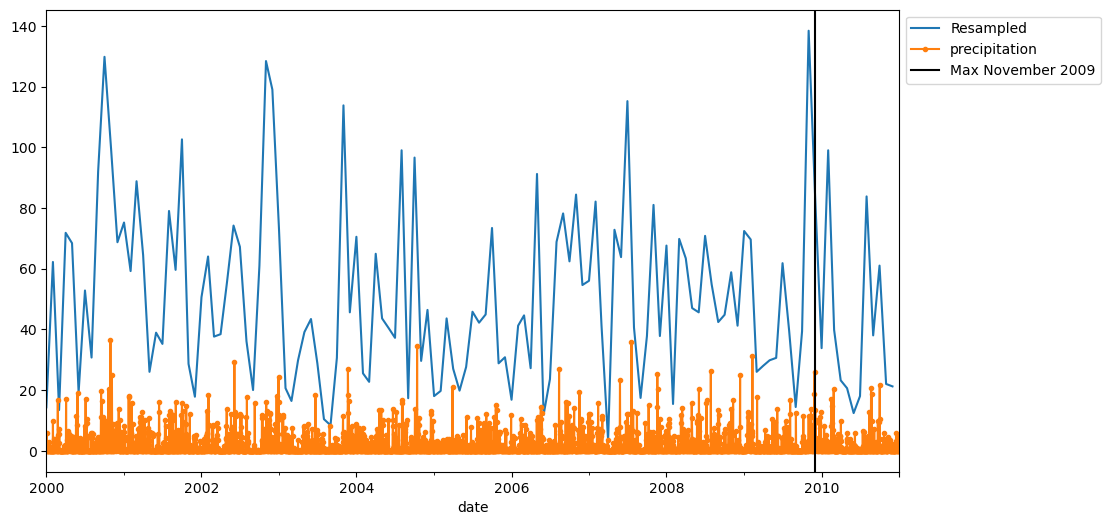

In [17]:
ax = ts_2.plot(style='.-')
ts.plot(style='.-',ax=ax)
fmt = "%B %Y"
ax.axvline(max_date, color='black', label=f'Max {max_date.strftime(fmt)}');
ax.legend(bbox_to_anchor=[1,1]);

## Question 1 Result:
*  The month with the most precipitation was November of 2009.

##  Question 2:
* Which year between 2000-2020 had the coolest average temperature?

In [18]:
df2.head()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [19]:
# filter for relevant years and columns
df2 = df2.loc['2000':'2020', ['mean_temp']]
df2

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [20]:
# Resample
ts_q2 = df2.resample("Y").mean()
ts_q2.name = 'Resampled'
ts_q2.head()

,mean_temp
date,
2000-12-31,11.532070
2001-12-31,11.313006
2002-12-31,12.006286
2003-12-31,12.232764
2004-12-31,11.872046


In [25]:
# Save the coldest year as a variable
cold_year = ts_q2.idxmin()
cold_year

mean_temp   2010-12-31
dtype: datetime64[ns]

In [37]:
plt.rcParams['figure.figsize'] = (14,6)

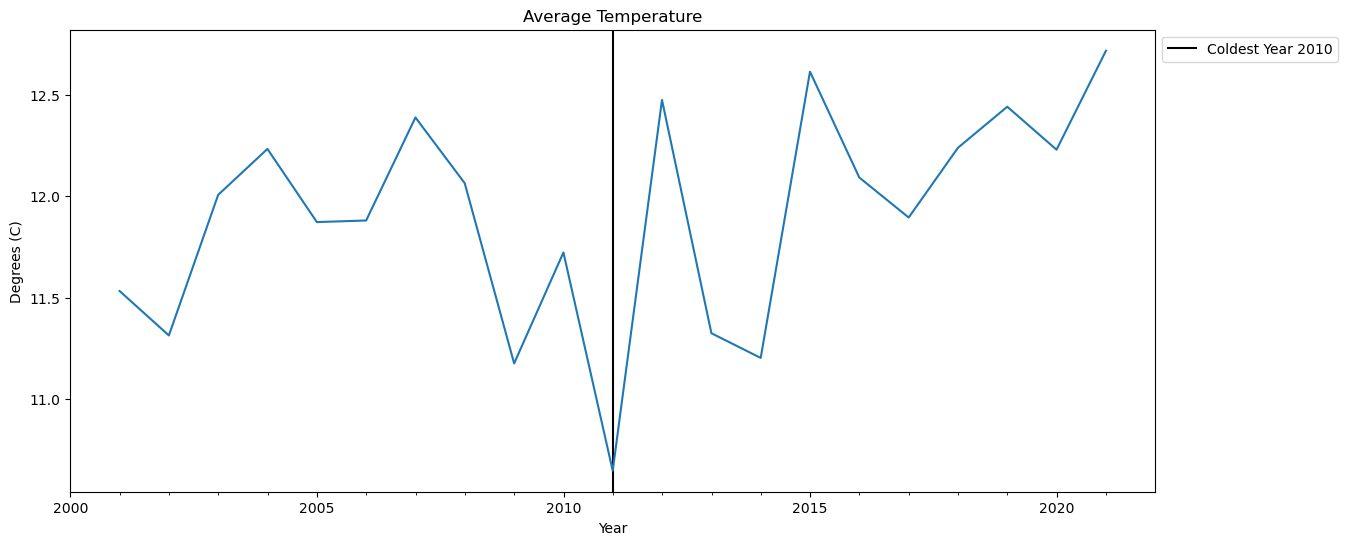

In [38]:
# Plot the coldest year
fig, ax = plt.subplots()
fmt = "%Y"
ax.axvline(cold_year, color='black', label=f'Coldest Year {2010}');
ax.plot(ts_q2);
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.set_title('Average Temperature')
ax.set(xlabel='Year', ylabel='Degrees (C)');
ax.legend(bbox_to_anchor=[1,1]);

## Question 2 Results:
*  The coldest year for the time period of 2000 - 2020 was 2010.